# 线性模型和梯度下降
神经网络的第一课，一个非常简单的模型，线性回归，同时也会学习一个优化算法-梯度下降法，对这个模型进行优化。线性回归是监督学习里面一个非常简单的模型，同时梯度下降也是深度学习中应用最广的优化算法

## 一元线性回归m

一元线性模型，模型：   $$\hat{y}_i = w x_i + b$$


目标函数，  最小化： $$\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2$$


如何最小化这个误差呢？  ——   **梯度下降**

## 梯度下降法
更新公式$$w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}$$

In [51]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch.autograd import Variable

t.manual_seed(2018)

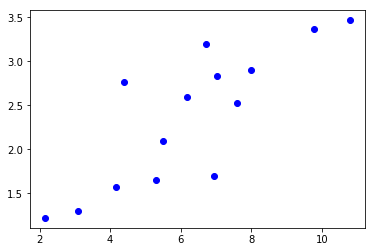

In [52]:
#读取数据
x_train = np.array([[4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]],dtype=np.float32)
y_train = np.array([[2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
# 画出图像
plt.plot(x_train,y_train, 'bo')

In [53]:
#转换成tensor
x_train = t.from_numpy(x_train)
y_train = t.from_numpy(y_train)

In [54]:
#定义参数w和b
w = Variable(t.randn(1),requires_grad=True)#随机初始化
b = Variable(t.zeros(1),requires_grad=True)#0初始化

In [55]:
#构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [56]:
y_ = linear_model(x_train)

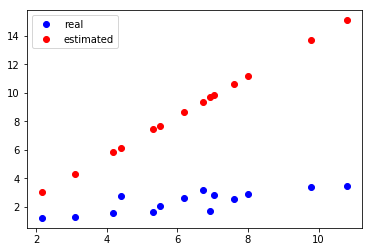

In [57]:
#可视化一下
plt.plot(x_train.data.numpy(),y_train.data.numpy(),'bo',label='real')
plt.plot(x_train.data.numpy(),y_.data.numpy(),'ro',label='estimated')
plt.legend()

In [58]:
#计算误差函数
def get_loss(y_,y):
    return t.mean((y_-y_train) ** 2)

loss = get_loss(y_,y_train)

#打印loss
print(loss)

Variable containing:
 47.9447
[torch.FloatTensor of size 1]



In [59]:
#自动求导
loss.backward()

In [60]:
#查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

Variable containing:
 92.2214
[torch.FloatTensor of size 1]

Variable containing:
 12.7840
[torch.FloatTensor of size 1]



In [61]:
#更新参数
w.data = w.data - 1e-4 * w.grad.data
b.data = b.data - 1e-4 * b.grad.data

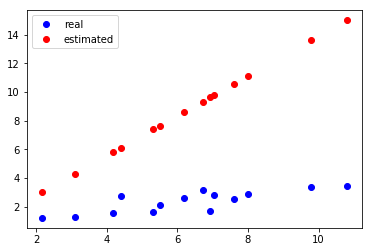

In [62]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [64]:
for e in range(100):
    y_ = linear_model(x_train)
    loss = get_loss(y_,y_train)
    
    #归零梯度
    w.grad.zero_() #归零梯度
    b.grad.zero_() #归零梯度
    loss.backward()
    
    #更新参数
    w.data = w.data - 1e-2 * w.grad.data 
    b.data = b.data - 1e-2 * b.grad.data
    
    print('epoch: {}, loss: {}'.format(e, loss.data[0]))

epoch: 0, loss: 0.6557829976081848
epoch: 1, loss: 0.27159371972084045
epoch: 2, loss: 0.2680060565471649
epoch: 3, loss: 0.2675665020942688
epoch: 4, loss: 0.2671549618244171
epoch: 5, loss: 0.26674553751945496
epoch: 6, loss: 0.2663379907608032
epoch: 7, loss: 0.26593247056007385
epoch: 8, loss: 0.2655287981033325
epoch: 9, loss: 0.265127032995224
epoch: 10, loss: 0.26472708582878113
epoch: 11, loss: 0.26432913541793823
epoch: 12, loss: 0.263933002948761
epoch: 13, loss: 0.26353877782821655
epoch: 14, loss: 0.2631463408470154
epoch: 15, loss: 0.26275578141212463
epoch: 16, loss: 0.2623670697212219
epoch: 17, loss: 0.26198020577430725
epoch: 18, loss: 0.2615951597690582
epoch: 19, loss: 0.26121196150779724
epoch: 20, loss: 0.26083049178123474
epoch: 21, loss: 0.2604508101940155
epoch: 22, loss: 0.2600729763507843
epoch: 23, loss: 0.25969693064689636
epoch: 24, loss: 0.2593226134777069
epoch: 25, loss: 0.2589500844478607
epoch: 26, loss: 0.2585792541503906
epoch: 27, loss: 0.2582102715

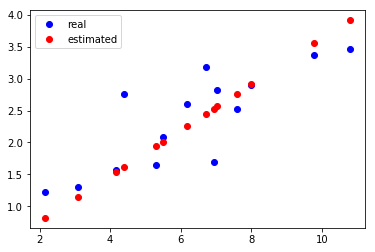

In [65]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()